# SNP Matching

**Created**: 19 May 2022

## Environment

In [1]:
library(tidyverse)

setwd("~/eQTL_pQTL_Characterization/")

source("03_Functional_Interpretation/scripts/utils/ggplot_theme.R")

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Load Data

In [4]:
fisher.results <- read.csv("~/gains_team282/epigenetics/enrichment/snp_matching/fisher_results.csv", row.names=1)

In [5]:
head(fisher.results)

,P_Value,Odds_Ratio,Odds_Ratio_Lower,Odds_Ratio_Upper
,<dbl>,<dbl>,<dbl>,<dbl>
Bulk_B-Control,0.5356893303,0.8152694,0.4508138,1.3810210
Bulk_B-Stimulated,0.0566138018,0.7833857,0.6003095,1.0105173
CD8pos_T-Control,0.0008625959,0.7823223,0.6753457,0.9058429
CD8pos_T-Stimulated,0.0002270878,0.7591094,0.6530619,0.8814754
Central_memory_CD8pos_T-Control,0.0001593302,0.7557973,0.6516516,0.8759762
Central_memory_CD8pos_T-Stimulated,0.0001424433,0.7518245,0.6464102,0.8734865


In [6]:
gains.tss.corrected <- read.csv("~/gains_team282/epigenetics/enrichment/snp_matching/gains_tss_corrected_results.csv", row.names=1)

In [7]:
head(gains.tss.corrected)

,P_Value
,<dbl>
Neutrophils-SA-3,0.7547
Neutrophils-WB,0.9530
Mem_B-Stimulated,0.9767
Monocytes-Stimulated,0.9773
Th2_precursors-Control,0.9914
Mem_B-Control,0.9922


In [8]:
shared.tss.corrected <- read.csv("~/gains_team282/epigenetics/enrichment/snp_matching/shared_tss_corrected_results.csv", row.names=1)

In [9]:
head(shared.tss.corrected)

,P_Value
,<dbl>
pDCs-Control,0.0450
Monocytes-Control,0.0832
Memory_Tregs-Control,0.0902
Myeloid_DCs-Control,0.1186
Neutrophils-FLAG,0.1236
Gamma_delta_T-Control,0.1339


## Fisher Enrichment Test

I used Fisher's exact test to determine if the ratio of sepsis-enhanced eSNPs overlapping a particular cell type was higher than the ratio of shared eSNPs overlapping the same cell type.

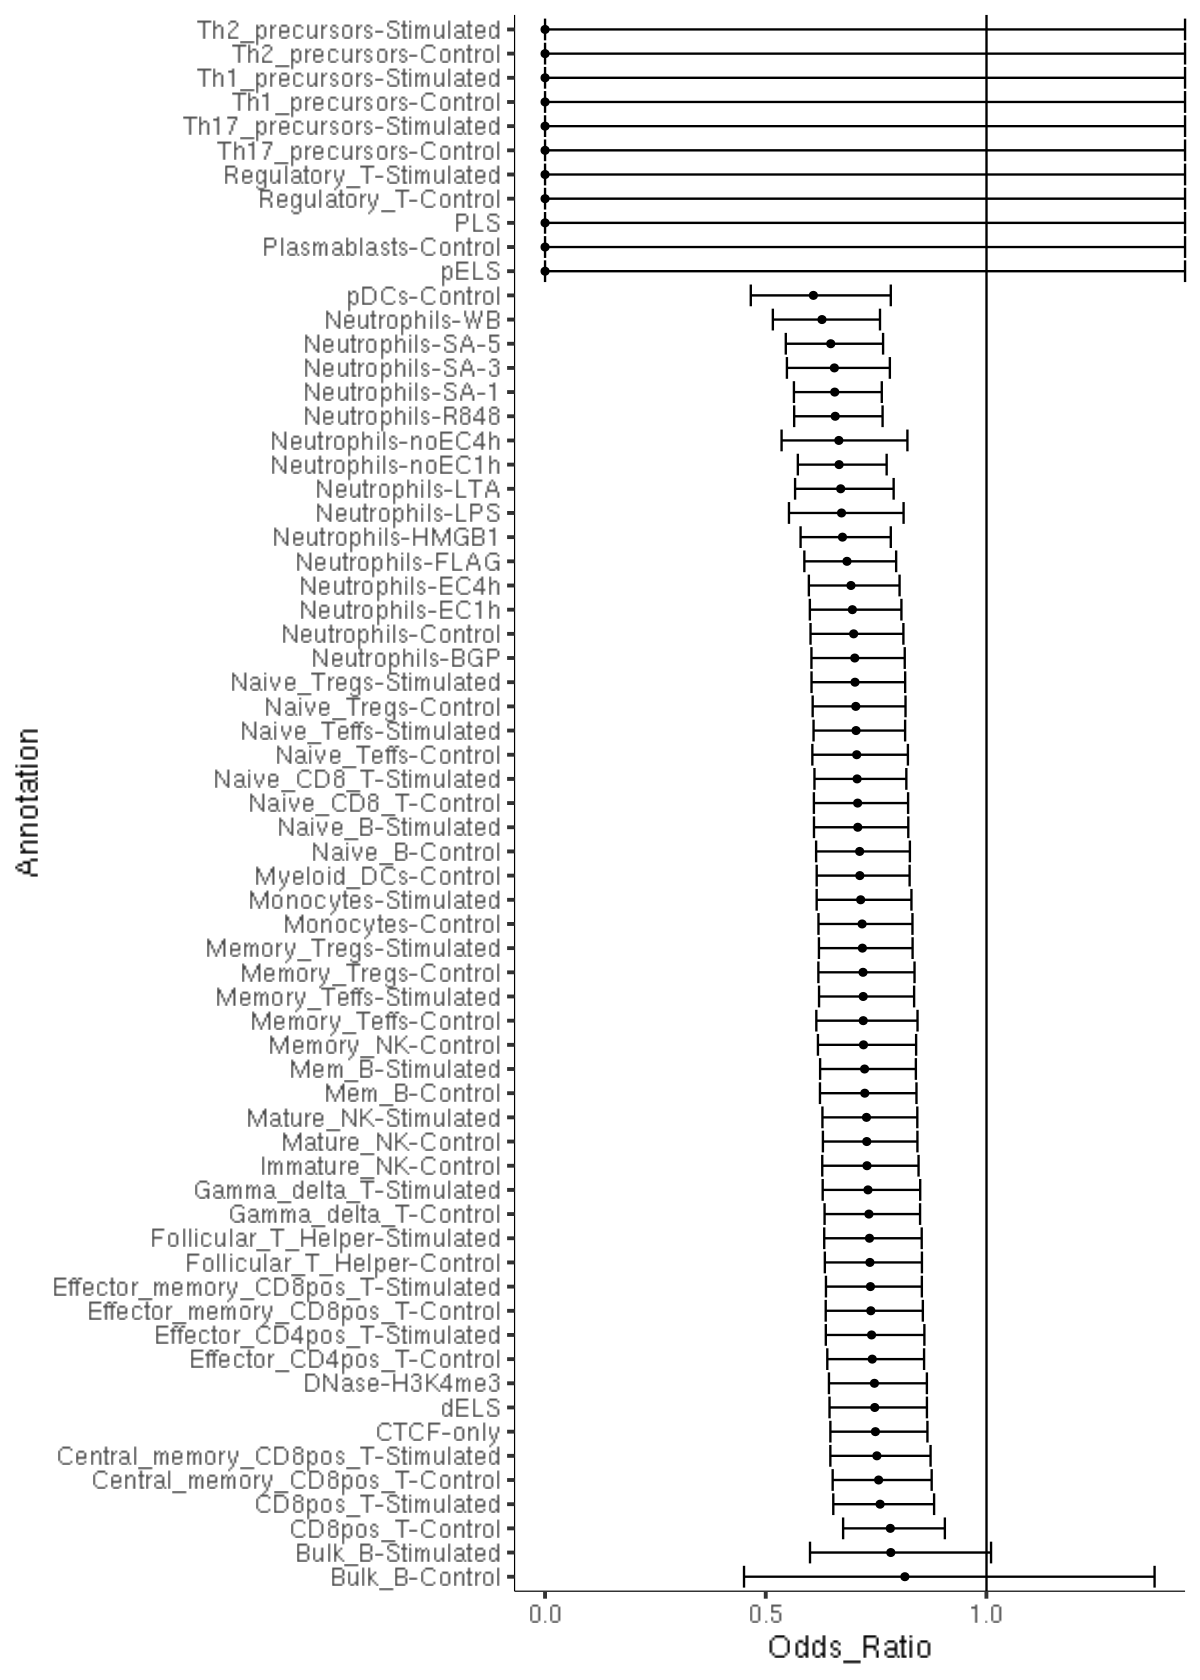

In [19]:
options(repr.plot.width=10, repr.plot.height=14)

fisher.results %>%
    dplyr::mutate(Annotation=rownames(.)) %>%
    dplyr::arrange(desc(Odds_Ratio)) %>%
    dplyr::mutate(Annotation=factor(Annotation, levels=Annotation)) %>%
    ggplot() +
    geom_point(aes(x=Annotation, y=Odds_Ratio)) +
    geom_errorbar(aes(x=Annotation, ymin=Odds_Ratio_Lower, ymax=Odds_Ratio_Upper)) +
    geom_hline(aes(yintercept=1.0)) +
    coord_flip() +
    ggplot_theme

## Results from Down-Sampling All Cis-eQTL

I down-sampled all cis-eQTL to either the number in the sepsis-enhanced or shared categories. During down-sampling, I stratified on the distance from the TSS to control for different types of functional elements found closer and farther away from the TSS.

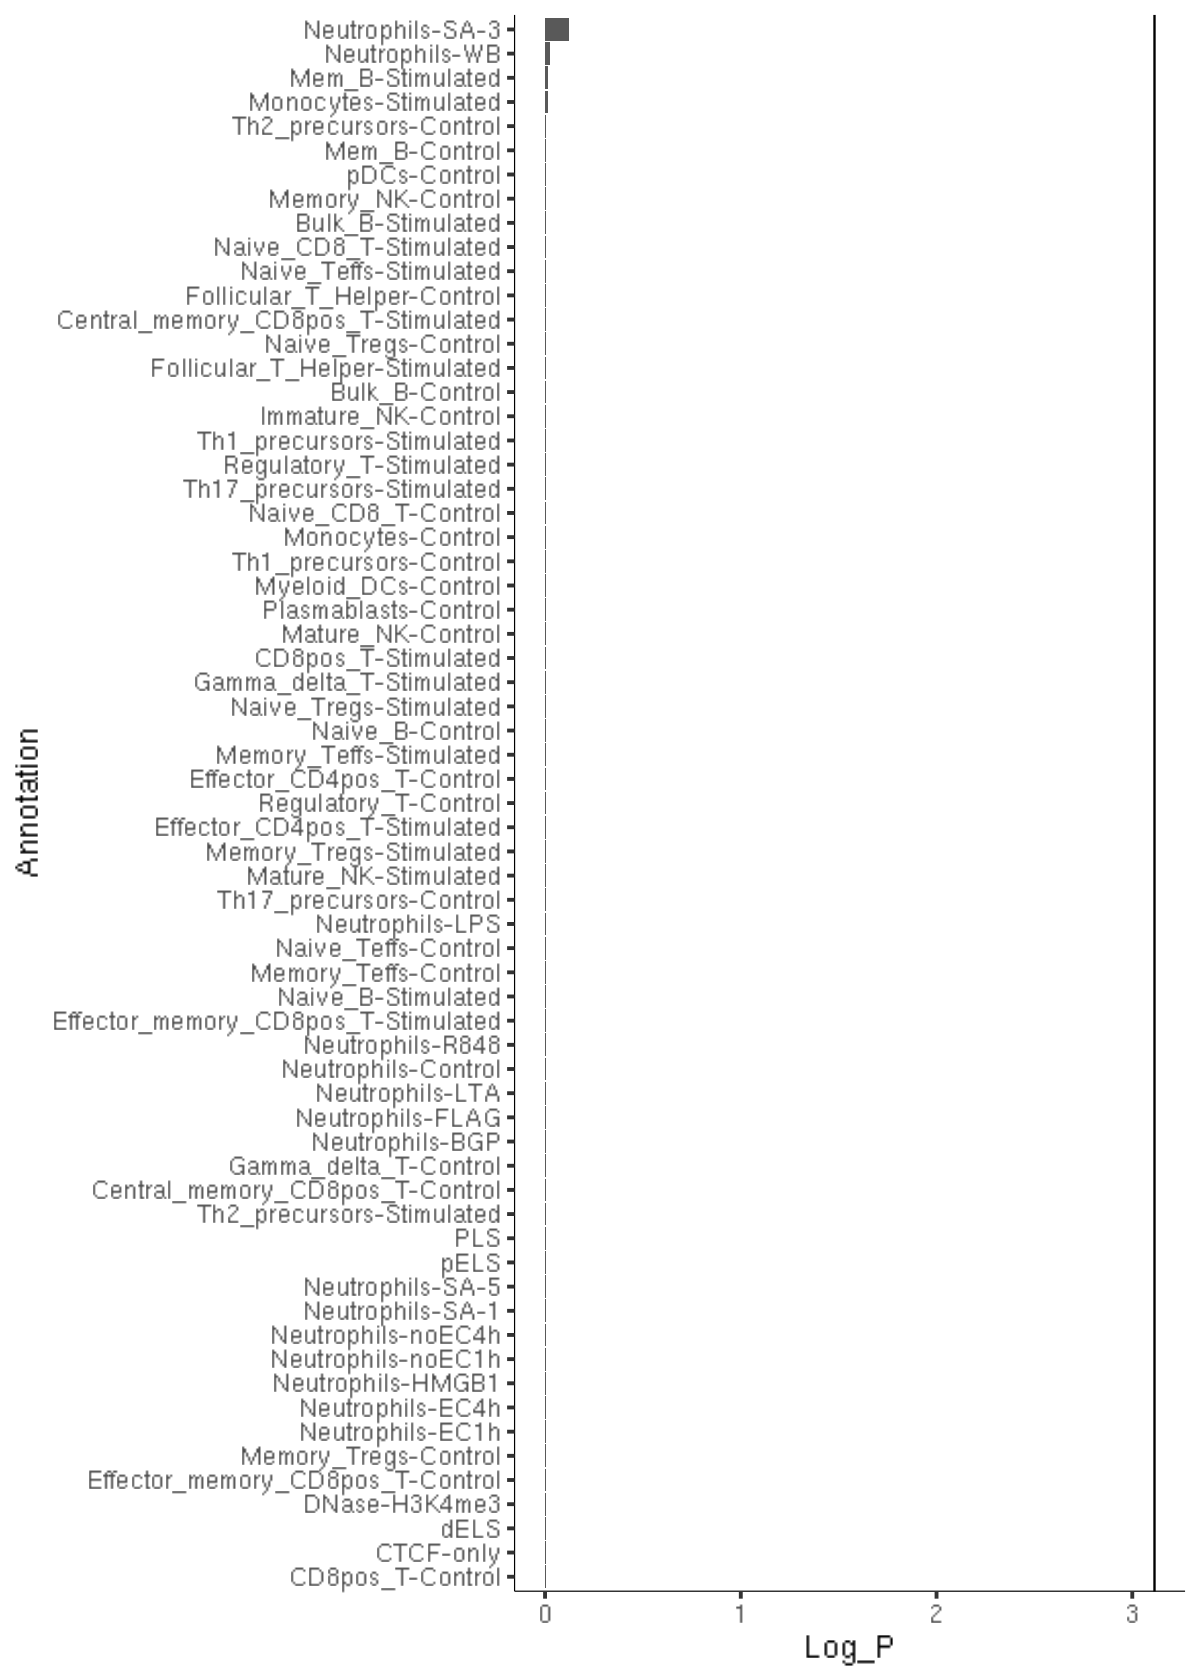

In [25]:
options(repr.plot.width=10, repr.plot.height=14)

gains.tss.corrected %>%
    dplyr::mutate(Annotation=rownames(.), Log_P=-log10(P_Value)) %>%
    dplyr::arrange(desc(P_Value)) %>%
    dplyr::mutate(Annotation=factor(Annotation, levels=Annotation)) %>%
    ggplot() +
    geom_bar(aes(x=Annotation, y=Log_P), stat="identity") +
    geom_hline(aes(yintercept=-log10(0.05 / nrow(gains.tss.corrected)))) +
    coord_flip() +
    ggplot_theme

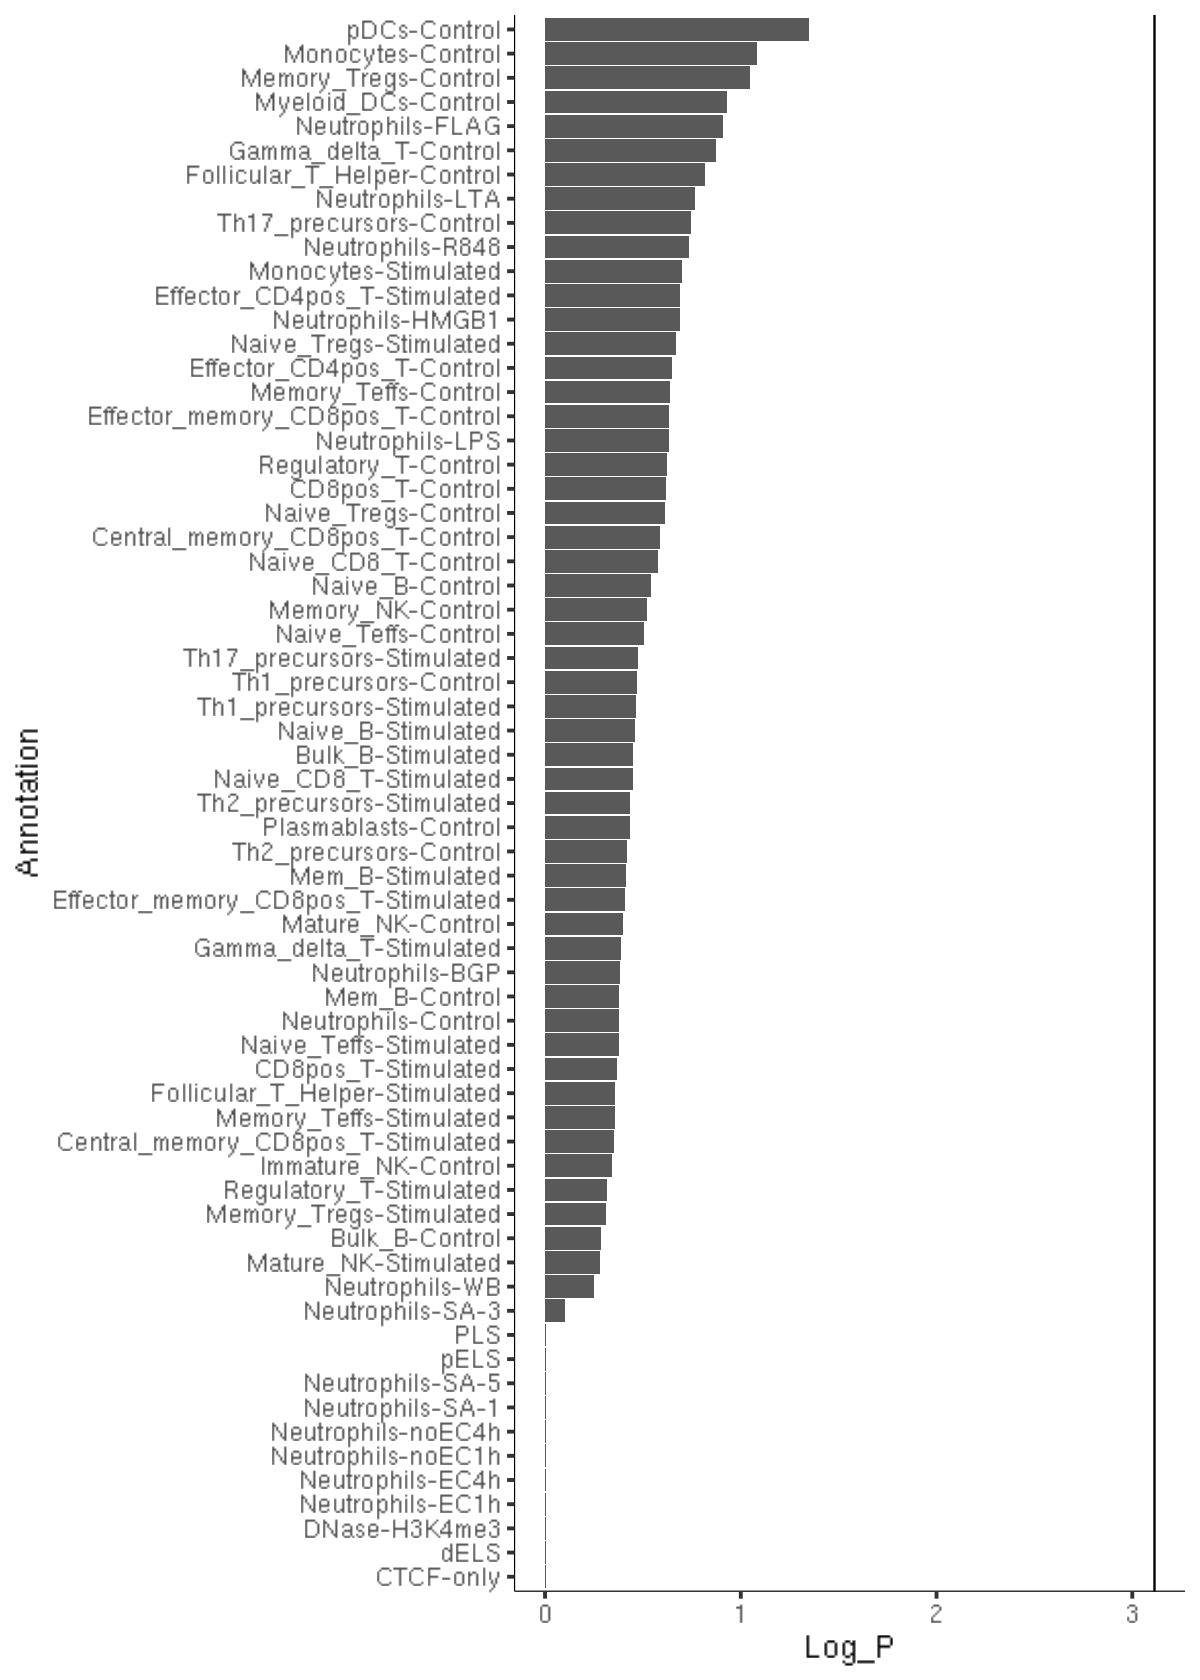

In [26]:
options(repr.plot.width=10, repr.plot.height=14)

shared.tss.corrected %>%
    dplyr::mutate(Annotation=rownames(.), Log_P=-log10(P_Value)) %>%
    dplyr::arrange(desc(P_Value)) %>%
    dplyr::mutate(Annotation=factor(Annotation, levels=Annotation)) %>%
    ggplot() +
    geom_bar(aes(x=Annotation, y=Log_P), stat="identity") +
    geom_hline(aes(yintercept=-log10(0.05 / nrow(shared.tss.corrected)))) +
    coord_flip() +
    ggplot_theme